## 유튜브 랭킹 사이트(유투비) 크롤링

In [1]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
from tqdm import tqdm_notebook

In [2]:
import requests
url = 'https://www.utoo.be/u2b/'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
req = requests.get(url, headers=header)
html = req.text
soup = BeautifulSoup(html, 'html.parser')

In [3]:
table = soup.select_one('.youtuberd-wrapper__table')
bodys = table.select('.body')

In [4]:
spans = bodys[0].select('span')
spans[3].get_text()

'139억3174만'

In [5]:
bodys[0].select_one('a').get_text()

'BLACKPINK'

In [14]:
ranks = []; c_names = []; categorys=[]; subs=[]; v_counts=[]

for i in tqdm_notebook(range(11)):
    base_url = 'https://www.utoo.be/u2b/index.php?fg_no=&st=&sv=&sort=subs&page='
    page_url = str(i+1)
    web_url = base_url + page_url
    with urllib.request.urlopen(web_url) as response:
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')
        table = soup.select_one('.youtuberd-wrapper__table')
        bodys = table.select('.body')
        for body in bodys:
            spans = body.select('span')
            
            ranks.append(spans[0].get_text().strip())
            c_names.append(body.select_one('a').get_text().strip())
            categorys.append(spans[1].get_text()[1:].strip())
            v_counts.append(int(spans[3].get_text().strip().replace('만', '').replace('억', '')))
            subs.append(int(spans[2].get_text().strip().replace('만', '')))

In [15]:
youtube_rank = pd.DataFrame({
    '랭킹' : ranks,
    '채널명' : c_names,
    '카테고리' : categorys,
    '구독자수(단위:만)' : subs,
    '조회수(단위:만)': v_counts
})
youtube_rank = youtube_rank.set_index('랭킹')
youtube_rank

,채널명,카테고리,구독자수(단위:만),조회수(단위:만)
랭킹,,,,
1,BLACKPINK,음악,5420,1393174
2,Big Hit Labels,엔터테인먼트,4890,1337586
3,BANGTANTV,음악,4180,606329
4,Boram Tube Vlog [보람튜브 브이로그],키즈,2720,1161168
5,SMTOWN,엔터테인먼트,2540,1886665
...,...,...,...,...
546,친친모 CarrieFriends,키즈,57,59523
547,눈쟁이,게임,57,21103
548,공돌이 용달,지식,57,14825


In [16]:
youtube_rank.to_csv('youtube ranking.csv', encoding='utf8', sep=',')

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [18]:
df = pd.read_csv('youtube ranking.csv')
df.head()

,랭킹,채널명,카테고리,구독자수(단위:만),조회수(단위:만)
0,1,BLACKPINK,음악,5420,1393174
1,2,Big Hit Labels,엔터테인먼트,4890,1337586
2,3,BANGTANTV,음악,4180,606329
3,4,Boram Tube Vlog [보람튜브 브이로그],키즈,2720,1161168
4,5,SMTOWN,엔터테인먼트,2540,1886665


In [19]:
df.tail()

,랭킹,채널명,카테고리,구독자수(단위:만),조회수(단위:만)
545,546,친친모 CarrieFriends,키즈,57,59523
546,547,눈쟁이,게임,57,21103
547,548,공돌이 용달,지식,57,14825
548,549,다영 DAYEONG,뷰티,57,7204
549,550,팩트TV NEWS,시사,57,44970


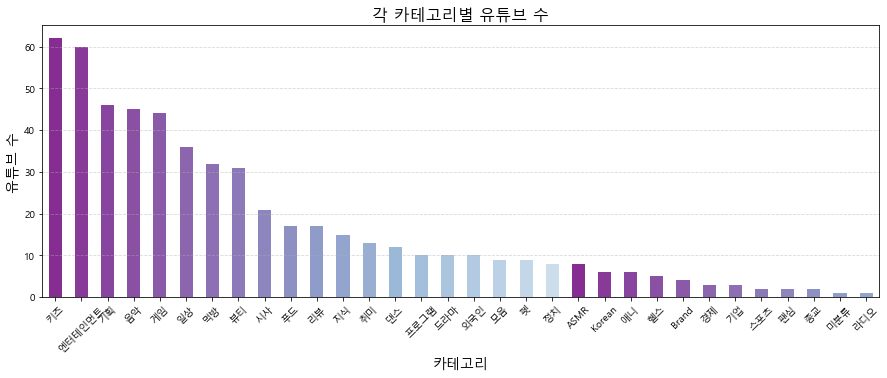

In [21]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 1, 1)

df_category = df.카테고리.value_counts()
df_category.plot.bar(rot=0, color=plt.get_cmap('BuPu')(np.linspace(0.8, 0.2, 20)))
plt.title("각 카테고리별 유튜브 수", fontsize=16)
plt.xlabel("카테고리", fontsize=14)
plt.ylabel("유튜브 수", fontsize=14)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.show()

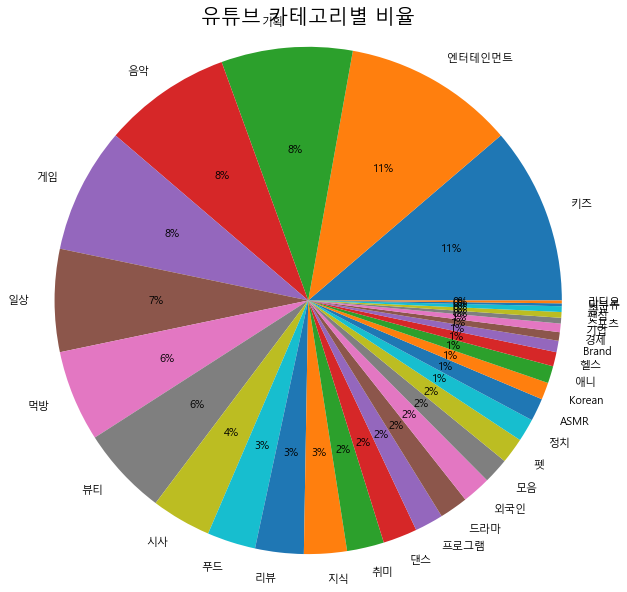

In [24]:
df_category = df.카테고리.value_counts()
plot_pie = df_category.plot.pie(figsize=(10,10), autopct='%1.0f%%', fontsize=11)
plt.title("유튜브 카테고리별 비율", fontsize=20)
plt.axis('equal')
plot_pie.set_ylabel('')
plt.show()

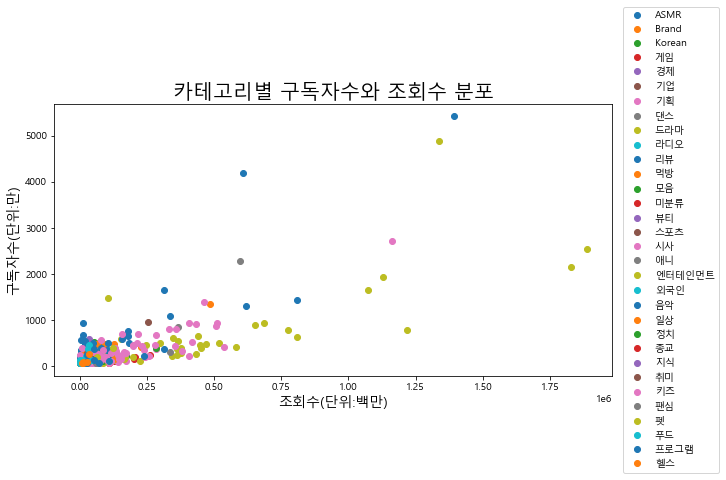

In [23]:
groups = df.groupby('카테고리')

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
for name, group in groups:
    ax.plot(group['조회수(단위:만)'], 
            group['구독자수(단위:만)'], 
            marker='o', 
            linestyle='',
            label=name)
            
ax.legend(ncol=1, loc='center right',	bbox_to_anchor=(1.2,0.5), scatterpoints=1 )
plt.title('카테고리별 구독자수와 조회수 분포', fontsize=20)
plt.xlabel('조회수(단위:백만)', fontsize=14)
plt.ylabel('구독자수(단위:만)', fontsize=14)
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   랭킹          550 non-null    int64 
 1   채널명         550 non-null    object
 2   카테고리        550 non-null    object
 3   구독자수(단위:만)  550 non-null    int64 
 4   조회수(단위:만)   550 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 21.6+ KB


In [28]:
fp1 = np.polyfit(df['랭킹'], df['조회수(단위:만)'], 1)
fp1

array([  -625.96584412, 276726.39550919])

In [37]:
fx = np.array([0, 550])  #x축은 numpy의 linspace로 만들고
f1 = np.poly1d(fp1)              #y축은 poly1d로 만듦
fy = f1(fx)
fy

array([276726.39550919, -67554.81875598])

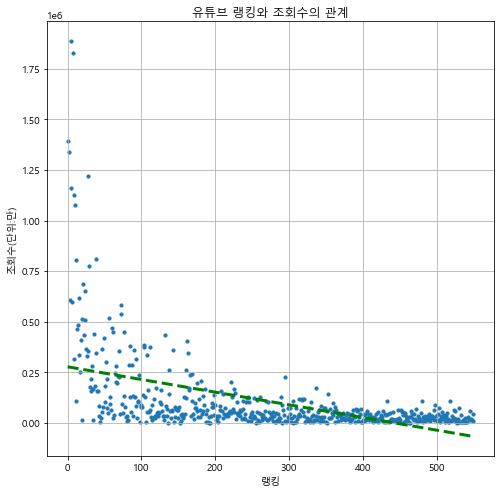

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(df['랭킹'], df['조회수(단위:만)'], s=10)
plt.plot(fx, fy, ls='dashed', lw=3, color='g') # 그린점선:전체 데이터의 대표값 역할을 한다. 
plt.grid(True)
plt.title('유튜브 랭킹와 조회수의 관계')
plt.xlabel('랭킹')
plt.ylabel('조회수(단위:만)')
plt.show()

In [39]:
df['오차'] = np.abs(df['조회수(단위:만)'] - f1(df['랭킹']))
df_sort = df.sort_values('오차', ascending=False)
df_sort.head()

,랭킹,채널명,카테고리,구독자수(단위:만),조회수(단위:만),오차
4,5,SMTOWN,엔터테인먼트,2540,1886665,1.613068e+06
6,7,1theK (원더케이),엔터테인먼트,2150,1828904,1.556559e+06
0,1,BLACKPINK,음악,5420,1393174,1.117074e+06
1,2,Big Hit Labels,엔터테인먼트,4890,1337586,1.062112e+06
27,28,MBCentertainment,엔터테인먼트,788,1219202,9.600026e+05


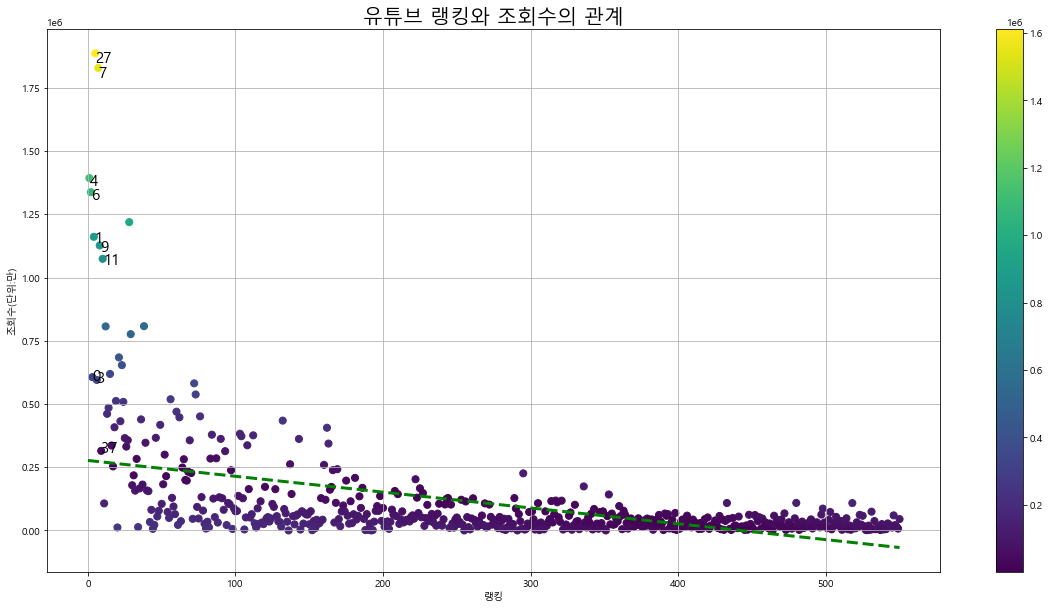

In [41]:
# 텍스트와 color map 입히기
plt.figure(figsize=(20,10))
plt.scatter(df['랭킹'], df['조회수(단위:만)'], c=df['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10):
    plt.text(df_sort['랭킹'][i]*1.02, 
                df_sort['조회수(단위:만)'][i]*0.98,
                df_sort.index[i], fontsize=15)
plt.grid(True)
plt.title('유튜브 랭킹와 조회수의 관계', fontsize=20)
plt.xlabel('랭킹')
plt.ylabel('조회수(단위:만)')
plt.colorbar()
plt.show()